In [15]:
using LinearAlgebra, Distributions, Random, Rotations
using Printf
using Plots

global const µ = 3.986e14  # m^3/s^2

include("eval_f.jl")
include("forward_euler.jl")
include("trap.jl")
include("generate_random_initial_state.jl")
include("visualizeNetwork.jl")

f(x, p) = feval(x, p, 0)
f(x) = f(x, 0)

f (generic function with 2 methods)

In [3]:
mean_a = 8e6
stddev_a = 1e4
mean_e = 0.01
stddev_e = 0.1

N = 100

x0 = generate_random_initial_state(N, mean_a, stddev_a, mean_e, stddev_e, true);

In [20]:
@time begin
    num_orbs = 1
    t0 = 0
    ti = 8e3 * num_orbs  # one orbit ~ 1e4 sec
    num_steps = 5000 * num_orbs

    xs_ = euler(f, t0, ti, x0, num_steps);
end

  4.562498 seconds (49.59 M allocations: 3.830 GiB, 14.01% gc time, 0.70% compilation time)


5001×600 Matrix{Float64}:
 58788.1        8.74493e6       -1.91985e5  …  5741.12   381.342  3781.75
 68574.3        8.74339e6       -1.8925e5      5736.79   387.712  3787.28
 78360.3        8.74183e6       -1.86516e5     5732.45   394.08   3792.81
 88146.2        8.74026e6       -1.83781e5     5728.1    400.448  3798.33
 97932.1        8.73867e6       -1.81045e5     5723.74   406.814  3803.84
     1.07718e5  8.73708e6       -1.7831e5   …  5719.37   413.178  3809.34
     1.17503e5  8.73547e6       -1.75574e5     5714.99   419.542  3814.84
     1.27289e5  8.73384e6       -1.72838e5     5710.6    425.903  3820.33
     1.37074e5  8.7322e6        -1.70101e5     5706.2    432.264  3825.81
     1.46859e5  8.73055e6       -1.67365e5     5701.78   438.623  3831.29
     1.56644e5  8.72889e6       -1.64628e5  …  5697.36   444.981  3836.75
     1.66428e5  8.72721e6       -1.6189e5      5692.93   451.337  3842.21
     1.76213e5  8.72552e6  -159153.0           5688.49   457.692  3847.66
     ⋮      

In [18]:
@time begin
    num_orbs = 1
    t0 = 0
    ti = 8e3 * num_orbs  # one orbit ~ 1e4 sec
    num_steps = 100 * num_orbs

    xs = trapezoid(f, t0, ti, x0, 0, num_steps);
    xs = reduce(hcat,xs)'  # vector of vectors -> 2d array
end

iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
 64.087391 seconds (416.56 M allocations: 64.705 GiB, 16.37% gc time)


101×600 adjoint(::Matrix{Float64}) with eltype Float64:
 58788.1        8.74493e6      -1.91985e5  …  5741.12   381.342  3781.75
     5.47503e5  8.65093e6  -55025.2           5512.15   697.889  4048.84
     1.03405e6  8.52308e6   82142.4           5258.84  1009.89   4296.22
     1.5164e6   8.36089e6       2.18971e5     4982.45  1316.07   4522.98
     1.99242e6  8.164e6         3.54882e5     4684.31  1615.18   4728.35
     2.45987e6  7.93215e6       4.89262e5  …  4365.79  1906.04   4911.6
     2.9164e6   7.66518e6       6.21466e5     4028.33  2187.5    5072.1
     3.35952e6  7.36311e6       7.50812e5     3673.4   2458.44   5209.32
     3.78666e6  7.02611e6       8.76582e5     3302.51  2717.8    5322.77
     4.19511e6  6.65454e6       9.98024e5     2917.22  2964.57   5412.08
     4.58207e6  6.24899e6       1.11435e6  …  2519.14  3197.77   5476.93
     4.94465e6  5.81028e6       1.22475e6     2109.88  3416.47   5517.1
     5.27988e6  5.33952e6       1.32836e6     1691.11  3619.79   5532.4

In [13]:
# Writes the visualization to example.html
visualizeNetwork(xs,"example.html",100)

In [ ]:
# Save the output as "orbs.txt" for reference or for use in animate.ipynb

using DelimitedFiles
writedlm("orbs.txt", xs)

In [23]:
function plot_force(xs)
    N = floor(Int, length(xs[1,:])/6)
    t_N = floor(Int, length(xs[:,1]))

    v_x = xs[:,4:6:end]
    v_y = xs[:,5:6:end]
    v_z = xs[:,6:6:end]
    
    force = zeros(t_N-1, N)
    for i in 1:N
        a = get_force(v_x[:,i], v_y[:,i], v_z[:,i])
        force[:,i] = a
    end
    
    force = force ./ mean(force)  # normalize by the mean force
    
    Plots.plot(force,label="")
end

function get_force(v_x, v_y, v_z)
    a_x = v_x[1:1:end-1] - v_x[2:1:end]
    a_y = v_y[1:1:end-1] - v_y[2:1:end]
    a_z = v_z[1:1:end-1] - v_z[2:1:end]
    
    force = sqrt.(a_x.^2 + a_y.^2 + a_z.^2)
    return force
end

get_force (generic function with 1 method)

In [24]:
plot_force(xs_)

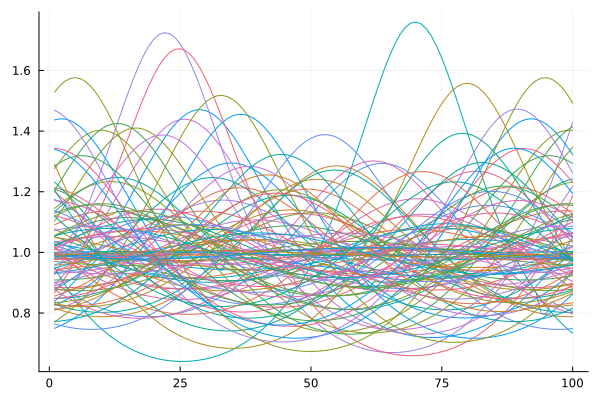

In [25]:
plot_force(xs)